In [21]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('../datasets/titanic.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


'Average Fare: 32'

'Middle Age: 24'

'Most Embarked Location: S'

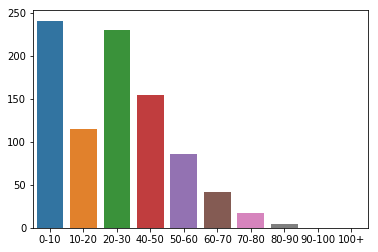

In [26]:
# Explore questions on population mean
average_fare = df.Fare.mean()
display("Average Fare: {0:.0f}".format(average_fare))

# Explore questions on population median
middle_age = df.Age.mean()
display("Middle Age: {0:.0f}".format(middle_age))

# Explore questions on population mode
most_embarked_location = df.Embarked.mode()
display("Most Embarked Location: {}".format(most_embarked_location[0]))

# Engineer a new feature (column)
deck_list = []
for a_cabin in df.Cabin:
    if a_cabin is np.nan:
        deck_list.append(np.nan)
    else:
        deck_list.append(a_cabin[0])
df['Deck'] = deck_list

# Clean out null values
cleaned_df = df.dropna()

def default_age(age_value):
    if np.isnan(age_value):
        return 0 
    else: 
        return age_value
        
df.Age = df.Age.apply(default_age)

# Discretize ages into categorical feature
min_age = 0
max_age = 100
n_buckets = 10

buckets = [-np.inf, 10, 20, 30, 40, 50, 60, 70, 80, 90, np.inf]
labels = ["0-10", "10-20", "20-30", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100", "100+"]

cut_df = pd.cut(x=df.Age, bins=buckets, labels=labels)
sns.barplot(y=cut_df.value_counts().values, x=cut_df.value_counts().index)

In [41]:
# whaaaaaa?!
len(df.Age[df.Age >= 0.0][df.Age < 10.0][df.Parch == 0])

158